In [1]:
#import necessary libraries

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib widget



In [2]:
#tell python where the data is located, based on the current folder
filePath = "..//..//data//"
# tell what is the file name we will open and load data
fileName = "output2022-05-30T17_40_08.csv" #"output2022-04-27T15_16_04.csv"



In [3]:
#load data into "data" variable
data = pd.read_csv(filePath+fileName)
#display data table

data

,Item1.width,Item1.height,Item1.avgBright,Item1.area,Item2.width,Item2.height,Item2.avgBright,Item2.area,Item3.width,Item3.height,Item3.avgBright,Item3.area
0,24,60,68.111111,991.0,27,55,61.995960,964.5,23,59,60.842299,954.0
1,24,59,68.371469,975.5,29,54,58.949553,942.5,24,58,59.397989,945.0
2,24,58,68.976293,1002.0,29,54,59.276501,946.0,23,58,61.380060,929.5
3,25,58,67.182759,998.0,27,55,61.059933,941.5,23,57,62.713959,946.0
4,24,58,69.464080,975.0,26,54,64.418803,934.0,23,57,62.157895,936.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54134,27,73,64.822425,1029.0,22,59,91.369029,836.5,21,31,70.079877,506.0
54135,24,71,73.635563,1035.0,24,55,88.632576,788.5,19,36,71.706140,521.0
54136,24,73,71.343607,1034.0,24,53,92.662736,778.0,19,40,68.065789,538.5
54137,24,72,72.998843,1041.0,25,51,91.916863,766.5,19,40,65.200000,566.0


In [4]:
brightness = list()
width = list()
height = list()
area = list()
for item in data.keys():
    if "avgBright" in item:
        brightness.append(item)
    if "width" in item:
        width.append(item)
    if "height" in item:
        height.append(item)
    if "area" in item:
        area.append(item)

#brightData = data[brightness]

'\nfor embryo in range(0,3):\n#data[height[0]]\n    if embryo == 0:\n        start = 50000\n        end =  52000\n    elif embryo == 1:\n        start = 52000\n        end =  54000\n    else:\n        start = 48000\n        end = 50000\n    fig = plt.figure(figsize=[20,10])\n    plt.plot(data[area[embryo]][start:end]/data[area[embryo]][start:end].max())\n    plt.plot(data[height[embryo]][start:end]/data[height[embryo]][start:end].max())\n    plt.plot(data[brightness[embryo]][start:end]/data[brightness[embryo]][start:end].max())\n'

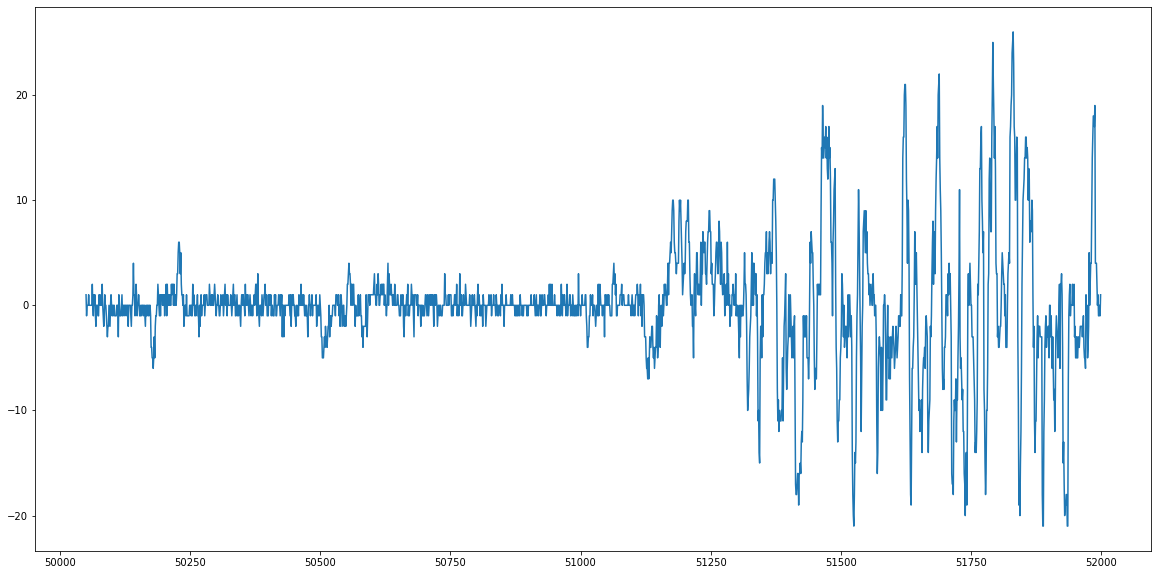

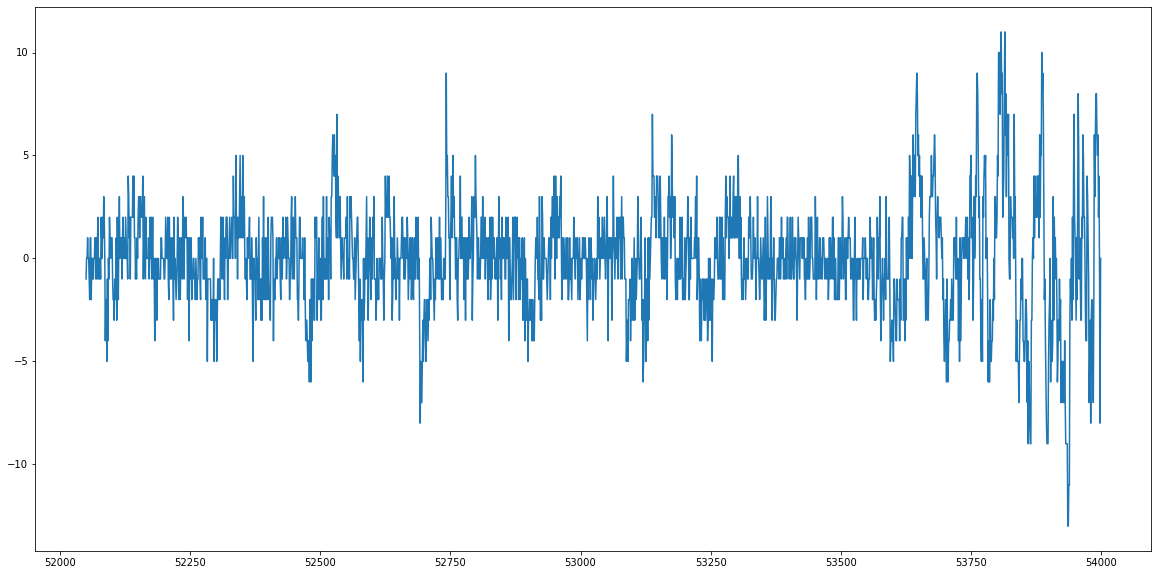

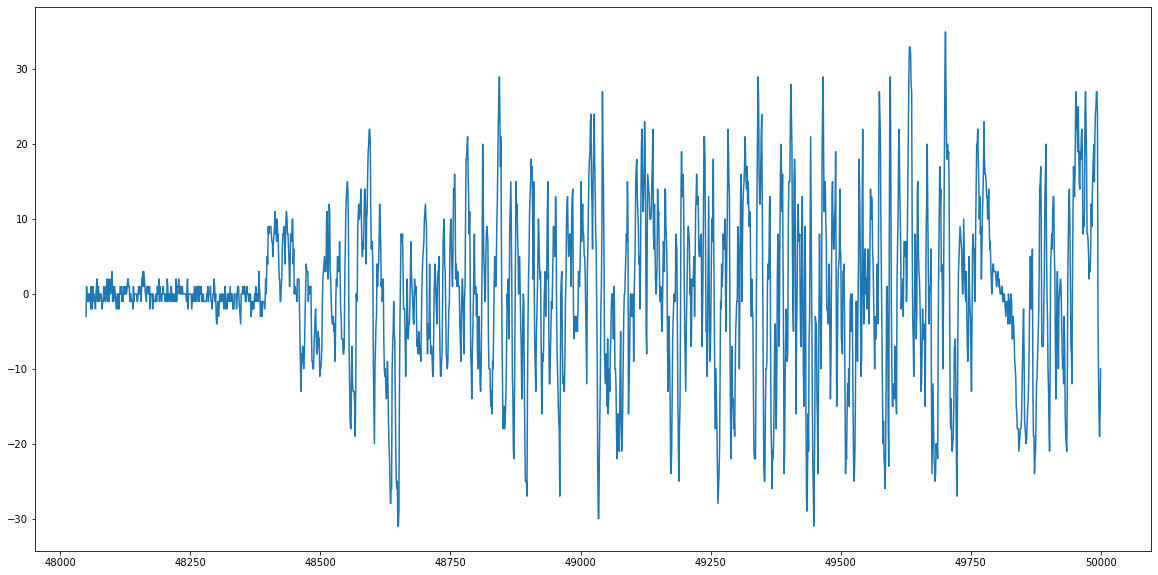

In [45]:
start = 47000 
end  = 54000
embryo = 1
for embryo in range(0,3):
#data[height[0]]
    if embryo == 0:
        start = 50000
        end =  52000
    elif embryo == 1:
        start = 52000
        end =  54000
    else:
        start = 48000
        end = 50000
    fig = plt.figure(figsize=[20,10])
    normBright = data[brightness[embryo]][start:end]/data[brightness[embryo]][start:end].max() 
    normHeight = data[height[embryo]][start:end]/data[height[embryo]][start:end].max()
    normArea = data[area[embryo]][start:end]/data[area[embryo]][start:end].max()  
    #plt.plot(normArea)
    #plt.plot(normHeight.abs())
    #plt.plot(normBright)
    plt.plot(data[height[embryo]][start:end].diff(periods=50))




"""
for embryo in range(0,3):
#data[height[0]]
    if embryo == 0:
        start = 50000
        end =  52000
    elif embryo == 1:
        start = 52000
        end =  54000
    else:
        start = 48000
        end = 50000
    fig = plt.figure(figsize=[20,10])
    plt.plot(data[area[embryo]][start:end]/data[area[embryo]][start:end].max())
    plt.plot(data[height[embryo]][start:end]/data[height[embryo]][start:end].max())
    plt.plot(data[brightness[embryo]][start:end]/data[brightness[embryo]][start:end].max())
"""


In [ ]:
start = 51000
end = 53000
fig = plt.figure(figsize=[20,10])
plt.plot(data[height[5]][start:end]+data[width[5]][start:end])
#plt.plot(data[width[1]][0:-1].diff())

In [ ]:
#use the change rate of height as an indicator of hatching. 
# grab those indexes to be used later for cutting traces
threshold = 10
hatchIndex = list()
for item in height:
    print(item)
    
    dummie = data[item].diff()
    hatchIndex.append(dummie.where(dummie>=threshold).first_valid_index()) 
    print(hatchIndex[-1])
    print("   ") 
print(hatchIndex)

In [ ]:

#calculate rolling average for each ROI and subtract that from brightness value
roll = 60
rolling = data[brightness].rolling(window=roll).mean()
subtracted = (data[brightness]-rolling)/rolling

#make all values positive by squaring all values than getting the square root
module = np.sqrt(subtracted**2)

#plt.hist(module[module.columns[0]],bins=50)

### TODO:

- finding hatching point towards the end.
    - (now done manually) all embryos are checked for hatching time point. There is also a check to see if hatched embryos did not swim over the other ones. 

- threshold each trace (value determined by eye) and all values above threshold are considered movement and summed. 
- calculate at which frame the first point above threshold happened (movement onset)
- average of values above threshold (average movement magnitude)
- duration between movement onset and hatching (as frames or hours/minutes).
- percentage of time moving (number of frames above threshold/ total frames)
- average bout length (at some point there are burst of movement intersped with no movement)
- between movement onset and hatching, divide trace into 40/60 periods and then calculate same as above.
- bin trace into 30min periods and do fft on each bin. compare differences between them.

In [ ]:
fig = plt.figure(figsize=[20,10])
plt.plot(module[brightness[0]][0:-1])

#need a sample of what movement onset looks like

In [ ]:
brightData

In [ ]:
start = 90000
end = -1
fig = plt.figure(figsize=[25,20])
sub1=plt.subplot(3,1,1)
plt.plot(data["topLeft.Item1.avgBright"][start:end])

"""
plt.plot(rolling["topLeft.Item1.avgBright"][start:end])
sub2=plt.subplot(3,1,2)
plt.plot(data["topLeft.Item1.width"][start:end])
plt.plot(rolling["topLeft.Item1.width"][start:end])
sub3=plt.subplot(3,1,3)
plt.plot(data["topLeft.Item1.height"][start:end])
plt.plot(rolling["topLeft.Item1.height"][start:end])
"""

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [ ]:
#plt.plot(detrended.ROI1[0:3000])
fig = plt.figure(figsize=[20,10])
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(data["topLeft.Item1.width"], Fs=100)
plt.xlabel('Time')
plt.ylabel('Frequency')
fig.colorbar(imageAxis)